## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [61]:
np.random.seed(42)

In [62]:
def add_watermark( ax):
        """Helper to add watermark to a plot."""
        ax.text(0.95, 0.95, "nidhish.jain",
                ha='right', va='top',
                transform=ax.transAxes,
                fontsize=10, color='gray', alpha=0.7)

## 6.1 Dataset prepration and loading

In [63]:
dataset = sklearn.datasets.load_digits()
X = dataset.data
y = dataset.target
print(X.shape, y.shape)
print(X[0])  ### each image is of 8*8 = 64 pixels so each image is represented as a 64 dim vector   

(1797, 64) (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , train_size = 0.8,random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


## Dimensionality reduction with PCA

In [65]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components

    def fit(self,df):
        self.mean = df.mean()
        mean = self.mean
        df = df - mean
        self.red_df = df
        num_elems = df.shape[0]
        A = df.to_numpy()
        cov = (A.T @ A) / (num_elems)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        self.eigenvalues = eigenvalues
        idxs = np.argsort(eigenvalues)[::-1] ###argsort will return indices that would sort the array
        ### we reverse the order to get descending order
        self.eigenvalues = eigenvalues[idxs]
        self.eigenvectors = eigenvectors[:,idxs]
        ##eigenvectors are colmn so we arrange as per here we need ok 
    
    def transform(self,df):
        data_ = df.to_numpy() #(nxd)
        W = self.eigenvectors[:,:self.n_components] #(dxk)
        transformed_data = data_ @ W
        return transformed_data
    
    def checkPCA(self):
        z = self.transform(self.red_df)
        return z.shape[1] == self.n_components
    
    def inverse_transform(self, transformed_data):
        X_re = transformed_data @ self.eigenvectors[:, :self.n_components].T + self.mean.to_numpy()
        return np.real(X_re)   # convert to real numbers
        ## here each component is itself a 784 dim vector so we get that sum accordingly

In [66]:
n_component_list = [2, 5, 10,20, 30, 40, 50, 64]
pca_class = []
train_data_transform = []
test_data_transform = []
for n in n_component_list:
    pca = PCA(n)
    pca.fit(pd.DataFrame(X_train))
    assert pca.checkPCA(), "PCA transformation did not yield the correct number of components"
    pca_class.append(pca)
    train_data_transform.append(pca.transform(pd.DataFrame(X_train)))
    test_data_transform.append(pca.transform(pd.DataFrame(X_test)))
    

## 6.3 KNN

In [67]:
k_vals = [5,25,50,100]
accuracies = {}
for k in k_vals:
    for n in n_component_list:
        idx = n_component_list.index(n)
        X_tr = train_data_transform[idx]
        X_te = test_data_transform[idx]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr, y_train)
        # y_pred = knn.predict(X_te)
        accuracy = knn.score(X_te, y_test)
        accuracies[(k,n)] = accuracy
        print(f"Accuracy for k={k} and n_components={n} is {accuracy}")

Accuracy for k=5 and n_components=2 is 0.6222222222222222
Accuracy for k=5 and n_components=5 is 0.9388888888888889
Accuracy for k=5 and n_components=10 is 0.9777777777777777
Accuracy for k=5 and n_components=20 is 0.9861111111111112
Accuracy for k=5 and n_components=30 is 0.9777777777777777
Accuracy for k=5 and n_components=40 is 0.9861111111111112
Accuracy for k=5 and n_components=50 is 0.9861111111111112
Accuracy for k=5 and n_components=64 is 0.9861111111111112
Accuracy for k=25 and n_components=2 is 0.6722222222222223
Accuracy for k=25 and n_components=5 is 0.9194444444444444
Accuracy for k=25 and n_components=10 is 0.9555555555555556
Accuracy for k=25 and n_components=20 is 0.975
Accuracy for k=25 and n_components=30 is 0.9722222222222222
Accuracy for k=25 and n_components=40 is 0.9777777777777777
Accuracy for k=25 and n_components=50 is 0.9777777777777777
Accuracy for k=25 and n_components=64 is 0.9777777777777777
Accuracy for k=50 and n_components=2 is 0.6611111111111111
Accura

## 6.4 Visualize and analyse

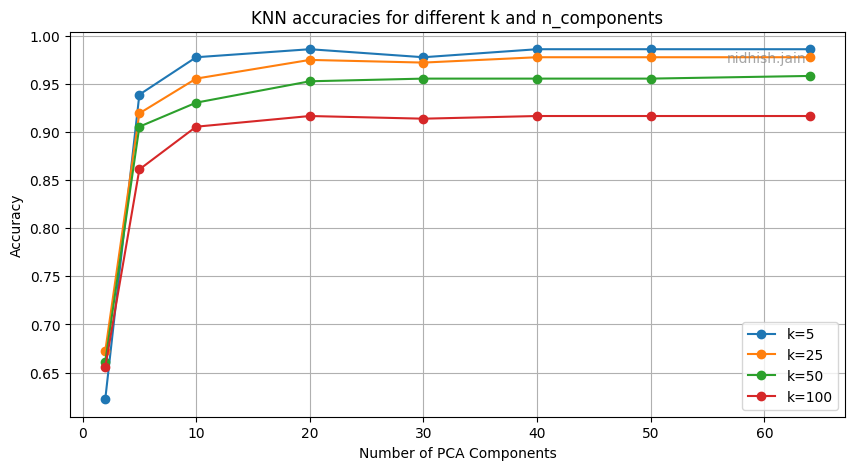

In [68]:
plt.figure(figsize = (10,5))
plt.title("KNN accuracies for different k and n_components")
##in one plot that means for diff n we can do 3 lines
for k in k_vals:
    acc = [accuracies[(k,n)] for n in n_component_list]
    plt.plot(n_component_list, acc, marker='o', label=f'k={k}')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
add_watermark(plt.gca())
plt.show()


Here we can see that the accuracy is increasing as we increase the number of PCAs. Reason - more information is retained with more number of pcas.

When we have less pcas then the distinction between two differnet digits reduces and as a result we can get overlaps.

But as we increase the PCA the distinction increases and we can see that the accuracy increases.

In case of increasing the k we can see the accuracy decreases. This is because when we increase k then we will even consider those points which are far and belong to same class but in lower value of k we pay close attention to nearest points which almost share the same features. In this way we get the different digits more accurately.